In [ ]:
import panpdas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

df = pd.read_excel('alta.xls')

df['Data'] = pd.to_datetime(df['Data'])

df['rok'] = df['Data'].dt.year
df['miesiac'] = df['Data'].dt.month
df['dzien'] = df['Data'].dt.day

df = df[['Data', 'Kurs zamknięcia']].dropna()
df = df.sort_values('Data')

df_sub = df.tail(300).reset_index(drop=True)

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_sub[['Kurs zamknięcia']].values)
X = data_scaled[:-1]  # Wszystkie wartości oprócz ostatniej
y = data_scaled[1:]   # Wszystkie wartości oprócz pierwszej (do przewidywania kolejnego punktu)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


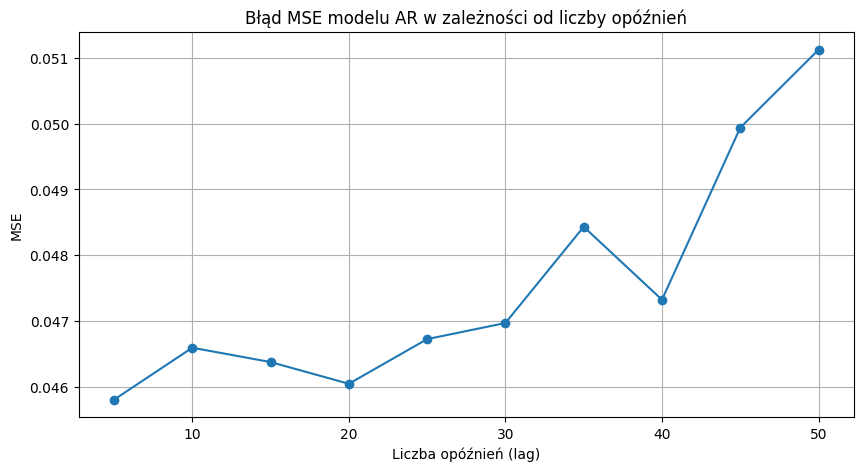

✅ Najlepszy model AR: lag = 5, MSE = 0.0458


In [11]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tools.sm_exceptions import MissingDataError

lags_range = range(5, 55, 5)
errors_ar = []

for lag in lags_range:
    try:
        model = AutoReg(X_train, lags=lag, old_names=False).fit()
        preds = model.predict(start=len(X_train), end=len(X_train) + len(X_test) - 1, dynamic=False)
        error = mean_squared_error(X_test, preds)
        errors_ar.append(error)
    except (ValueError, MissingDataError) as e:
        print(f'Błąd przy lag={lag}: {e}')
        errors_ar.append(np.nan)  # Na wypadek błędu, np. za mało danych

# 5. Wykres błędów
plt.figure(figsize=(10, 5))
plt.plot(lags_range, errors_ar, marker='o')
plt.title('Błąd MSE modelu AR w zależności od liczby opóźnień')
plt.xlabel('Liczba opóźnień (lag)')
plt.ylabel('MSE')
plt.grid()
plt.show()

# 6. Najlepszy model
valid_errors = [(lag, err) for lag, err in zip(lags_range, errors_ar) if not np.isnan(err)]
best_lag, best_error = min(valid_errors, key=lambda x: x[1])
print(f'✅ Najlepszy model AR: lag = {best_lag}, MSE = {best_error:.4f}')

E:\STUDIA\MIWPRO7\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


E:\STUDIA\MIWPRO7\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


E:\STUDIA\MIWPRO7\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


E:\STUDIA\MIWPRO7\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


E:\STUDIA\MIWPRO7\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


E:\STUDIA\MIWPRO7\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


E:\STUDIA\MIWPRO7\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


E:\STUDIA\MIWPRO7\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


E:\STUDIA\MIWPRO7\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


E:\STUDIA\MIWPRO7\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


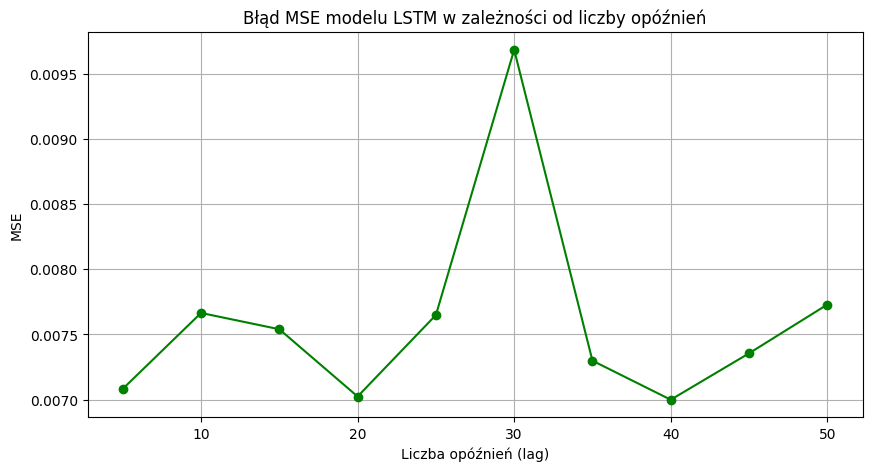

Najlepszy model LSTM ma lag = 40, MSE = 0.0070


In [12]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

errors_lstm = []

for lag in lags_range:
    model = Sequential()
    model.add(LSTM(50, input_shape=(lag, 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=30, batch_size=1, verbose=0)

    y_pred = model.predict(X_test)
    y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
    y_pred_inv = scaler.inverse_transform(y_pred)

    mse = mean_squared_error(y_test_inv, y_pred_inv)
    errors_lstm.append(mse)

# Wykres błędów LSTM
plt.figure(figsize=(10, 5))
plt.plot(lags_range, errors_lstm, marker='o', color='green')
plt.title('Błąd MSE modelu LSTM w zależności od liczby opóźnień')
plt.xlabel('Liczba opóźnień (lag)')
plt.ylabel('MSE')
plt.grid()
plt.show()

# Wybór najlepszego modelu
best_lag_lstm = lags_range[np.argmin(errors_lstm)]
print(f'Najlepszy model LSTM ma lag = {best_lag_lstm}, MSE = {min(errors_lstm):.4f}')
